In [96]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp

import scipy.stats as sps

In [94]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

import numpy as np

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sn

pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline

In [229]:
d1 = pd.read_csv('coursework_1_data_2019 (1).csv')
d1.head()

,local_authority_area,2008_cases_total,2013_cases_total,2018_cases_total,2008_pop_total,2013_pop_total,2018_pop_total,2008_case_ratio,2018_case_ratio,change_in_case_ratio,...,2018_pop_female,total_budget,clean_air,clean_environ,health_training,school_awareness,media_awareness,sub_counselling,region,local_authority_type
0,Barking and Dagenham,593,619,763,172684,179030,181779,0.0034,0.0042,0.0008,...,103796,139000,21000,22000,18000,41000,18000,19000,London,london_borough
1,Barnet,539,594,773,340435,344062,355955,0.0016,0.0022,0.0006,...,194186,220000,50000,17000,23000,74000,30000,26000,London,london_borough
2,Barnsley,360,451,527,226755,244010,257883,0.0016,0.0020,0.0005,...,130828,160000,41000,45000,5000,26000,29000,14000,Yorkshire and the Humber,metropolitan_borough
3,Bath and North East Somerset,456,421,494,178625,172975,189334,0.0026,0.0026,0.0001,...,98444,161000,33000,42000,19000,50000,10000,7000,South West,unitary_authority
4,Bedford,311,327,367,158185,164807,170463,0.0020,0.0022,0.0002,...,87854,130000,37000,52000,17000,8000,3000,13000,East of England,unitary_authority


In [211]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(color_codes=True)


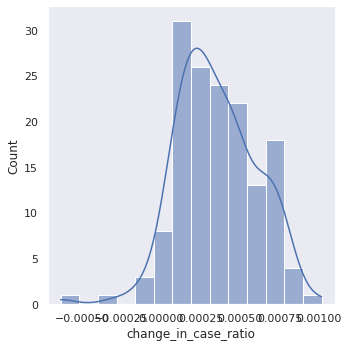

In [250]:
sns.displot(d1, x="change_in_case_ratio", kde=True)

Text(0.5, 1.0, 'Correlation Matrix')

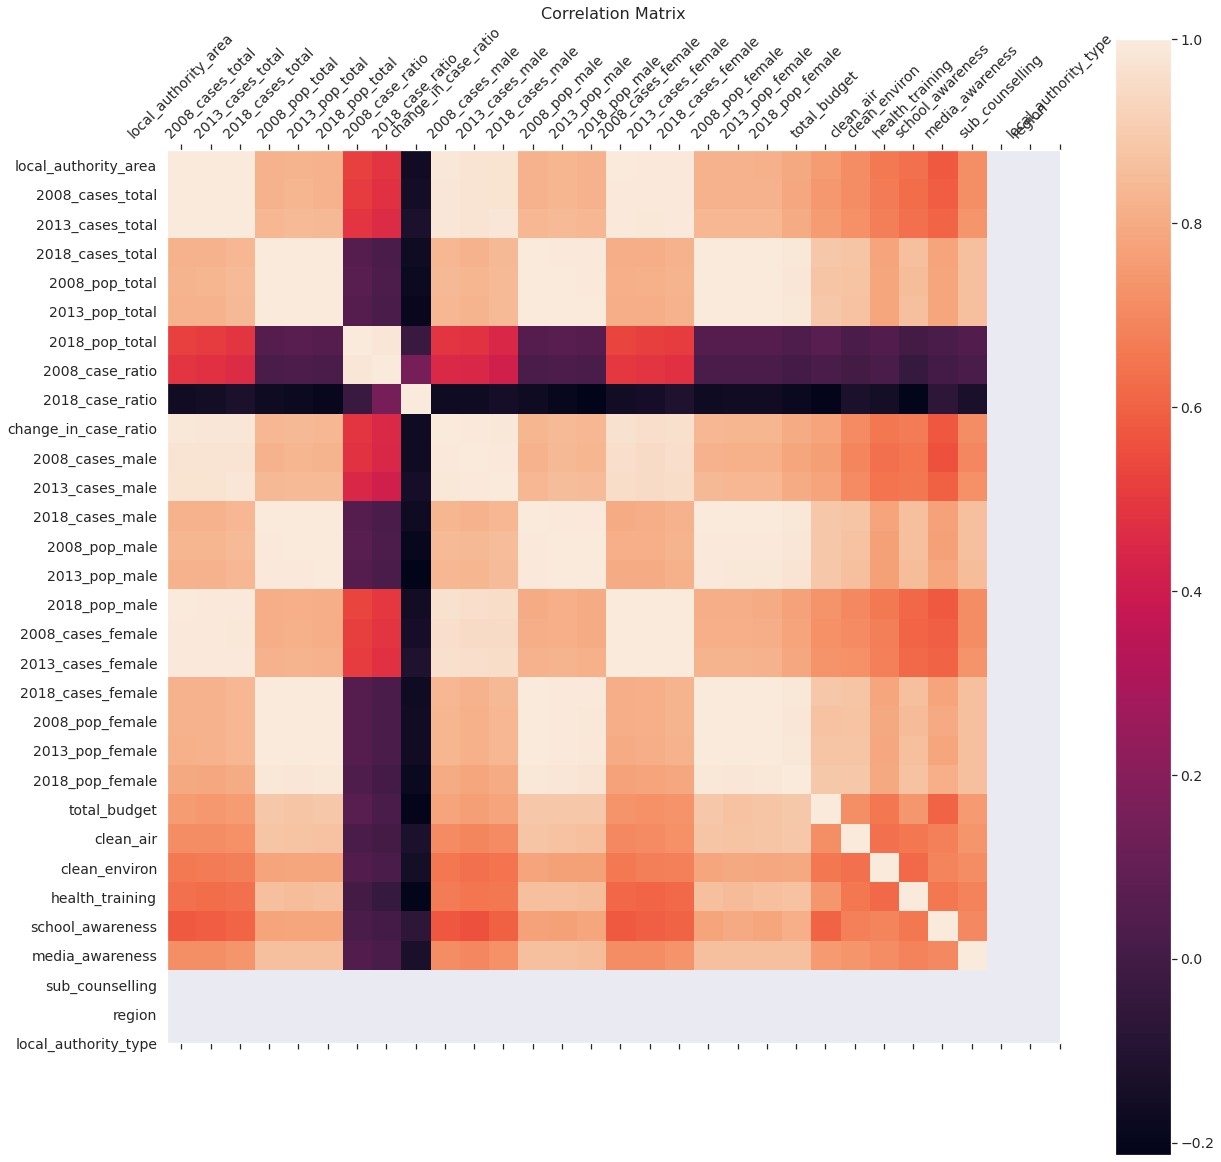

In [222]:
#check correlation between variables

plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(20, 20))
plt.matshow(d1.corr(), fignum=f.number)
plt.xticks(range(d1.shape[1]), d1.columns, fontsize=14, rotation=45)
plt.yticks(range(d1.shape[1]), d1.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

In [83]:
conditionx_spending = d1.loc[:,['clean_air', 'clean_environ', 'health_training', 'school_awareness', 'sub_counselling','media_awareness']]

In [137]:
# calculating VIF
# This function is partially from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: the max VIF value before the feature is removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const')
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [138]:
d1.columns

Index(['local_authority_area', '2008_cases_total', '2013_cases_total',
       '2018_cases_total', 'change_in_cases', '2008_pop_total',
       '2013_pop_total', '2018_pop_total', 'change_in_pop', '2008_case_ratio',
       '2018_case_ratio', 'change_in_case_ratio', '2008_cases_male',
       '2013_cases_male', '2018_cases_male', '2008_pop_male', '2013_pop_male',
       '2018_pop_male', '2008_cases_female', '2013_cases_female',
       '2018_cases_female', '2008_pop_female', '2013_pop_female',
       '2018_pop_female', 'total_budget', 'clean_air', 'clean_environ',
       'health_training', 'school_awareness', 'media_awareness',
       'sub_counselling', 'region', 'local_authority_type'],
      dtype='object')

In [234]:
df_predictors_selected_VIF = drop_column_using_vif_(conditionx_spending.drop('clean_air', axis=1))
print("The columns remaining after VIF selection are:")
print(df_predictors_selected_VIF.columns)

The columns remaining after VIF selection are:
Index(['clean_environ', 'health_training', 'school_awareness',
       'sub_counselling', 'media_awareness'],
      dtype='object')


In [16]:
# This package will allow for multilinear regression. You can also use it for simple linear regression.
# If you do not have it, you can download it from here:
# http://statsmodels.sourceforge.net/install.html
# After installing, you may need to close and reopen Canopy or reboot your computer.

import statsmodels.formula.api as smf
import statsmodels.api as sm

In [246]:
# It turns out it's easier to work with columns with single word names, so...


# This performs a multiple regression of wellbeing against greenery and natural light:
multi_regression_model_1 = smf.ols(formula='change_in_case_ratio ~ clean_environ + health_training + school_awareness + sub_counselling + media_awareness ',data=d1).fit()

# And this gives a big summary of the results:
print(multi_regression_model_1.summary())

                             OLS Regression Results                             
Dep. Variable:     change_in_case_ratio   R-squared:                       0.057
Model:                              OLS   Adj. R-squared:                  0.025
Method:                   Least Squares   F-statistic:                     1.760
Date:                  Mon, 16 Nov 2020   Prob (F-statistic):              0.125
Time:                          01:21:56   Log-Likelihood:                 1048.8
No. Observations:                   152   AIC:                            -2086.
Df Residuals:                       146   BIC:                            -2067.
Df Model:                             5                                         
Covariance Type:              nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           

In [258]:
# Pick out some values of interest and print the regression equation:

beta_0, beta_1, beta_2, beta_3, beta_4, beta_5 = multi_regression_model_1.params
rsq                    = multi_regression_model_1.rsquared
pval_0, pval_1, pval_2, pval_3, pval_4, pval_5 = multi_regression_model_1.pvalues

print("y =", beta_1, "x1 +", beta_2, "x2 +", beta_3, "x3 +", beta_4, "x4 +", beta_5, "x5 +", round(beta_0,8))
print("R^2     = ", rsq)
print("p-value_1 = ", round(pval_1,3))
print("p-value_2 = ", round(pval_2,3))
print("p-value_3 = ", round(pval_3,3))
print("p-value_4 = ", round(pval_4,3))
print("p-value_5 = ", round(pval_5,3))


y = -6.77828415456812e-11 x1 + -1.2376408258156763e-09 x2 + -1.1646244241301758e-09 x3 + 1.7659511342928544e-10 x4 + 1.5528729437550237e-09 x5 + 0.00040309
R^2     =  0.05685314590435364
p-value_1 =  0.898
p-value_2 =  0.375
p-value_3 =  0.038
p-value_4 =  0.923
p-value_5 =  0.158


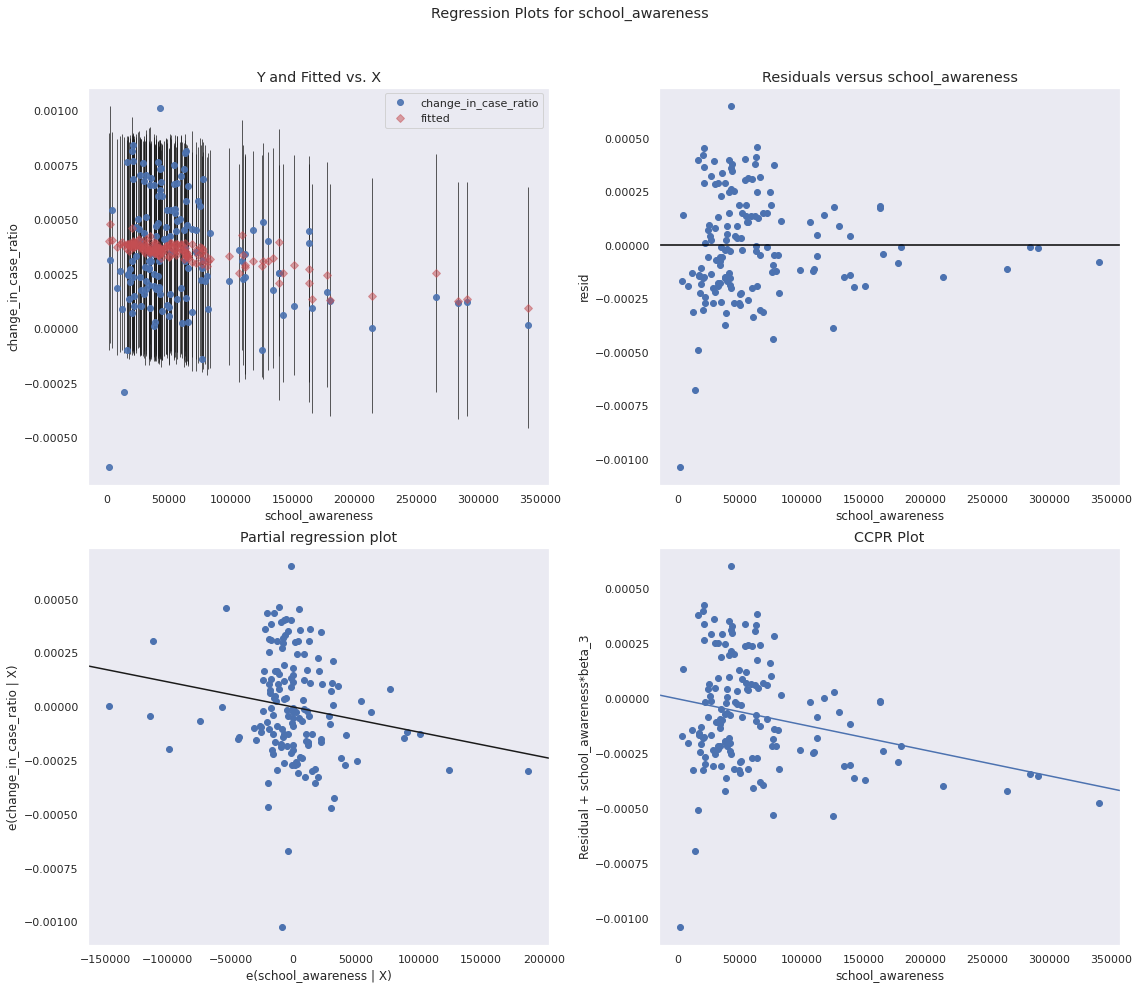

In [259]:
# produce regression plots
fig = plt.figure(figsize=(16,14))
fig = sm.graphics.plot_regress_exog(multi_regression_model_1, 'school_awareness', fig=fig)

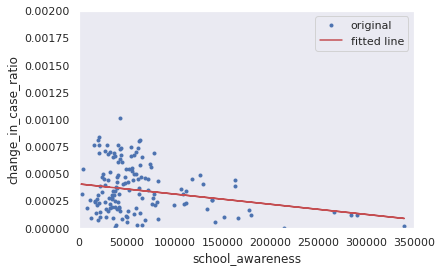

y = -9.33577684776759e-10 x + 0.00040794838525707065
Rsq =  0.04161124300472331
p-value =  0.01171085338449282

Correlation between x and y: -0.204


In [261]:
X = d1['school_awareness']
Y = d1['change_in_case_ratio']

a = plt.plot(X,Y,'.', label = 'original')
plt.xlim(0,350000)
plt.ylim(0,0.002)

plt.xlabel('school_awareness')
plt.ylabel('change_in_case_ratio')
slope, intercept, r_value, p_value, std_err = sps.linregress(X, Y) 

b = plt.plot(X, X*slope + intercept, 'r', label = 'fitted line') # Plot the regression line.

plt.legend()
plt.show()

print("y =", slope, "x +", intercept)
print("Rsq = ", r_value**2)
print("p-value = ", p_value)
print()

corr, corr_p_val = sps.pearsonr(X, Y)
print("Correlation between x and y:", round(corr,3))

In [162]:

# calculate the spearmans's correlation between two variables
from numpy.random import randn
from numpy.random import seed
from scipy.stats import spearmanr
# seed random number generator
seed(1)
# prepare data
data1 = d1['school_awareness']
data2 = d1['change_in_case_ratio']
# calculate spearman's correlation
corr, _ = spearmanr(data1, data2)
print('Spearmans correlation: %.3f' % corr)


Spearmans correlation: -0.093


In [223]:

# calculate the Pearson's correlation between two variables
from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr
# seed random number generator
seed(1)
# prepare data
data1 = d1['school_awareness']
data2 = d1['change_in_case_ratio']
# calculate Pearson's correlation
corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.204


y = -0.0 x1 + -0.0 x2 + 0.0
R^2     =  0.05685314590435364
p-value_1 =  0.898
p-value_2 =  0.375
p-value_3 =  0.038
p-value_4 =  0.923
p-value_5 =  0.158


In [166]:

# calculate the covariance between two variables
from numpy.random import randn
from numpy.random import seed
from numpy import cov
# seed random number generator
seed(1)
# prepare data
data1 = d1['school_awareness']
data2 = d1['change_in_case_ratio']
# calculate covariance matrix
covariance = cov(data1, data2)
print(covariance)

[[ 3.03117463e+09 -2.82983699e+00]
 [-2.82983699e+00  6.34893955e-08]]
